## Time Series Analysis Using Python

1- Import relevant python libraries

2- Generate a non-stationary time series data

3 - plot the time series data and inspect for statioarity

4 - check the time series data for stationarity using ADF test

5 - Transform the series to stationary and plot it to vizualize

6 - If the series is stationary, Plot ACF and PACF to determine the order(lags) of AR and MA models

7 - Build AR, MA, and ARIMA models


In [1]:
# important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

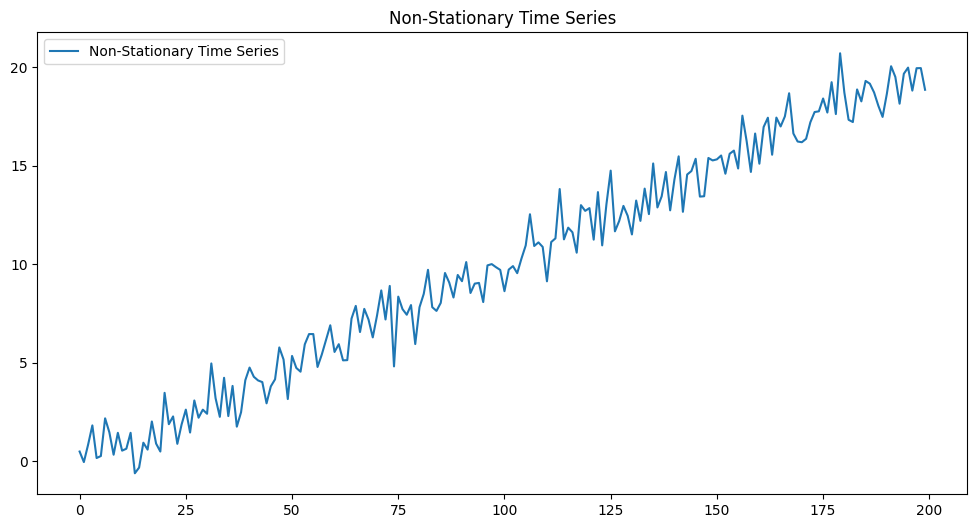

In [2]:
# Step 1: Create a non-stationary time series

np.random.seed(42)
n = 200
trend = np.linspace(0, 20, n)
noise = np.random.normal(0, 1, n)
non_stationary_series = trend + noise

# Convert to a Pandas Series
time_series = pd.Series(non_stationary_series)

# Plot the non-stationary time series
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Non-Stationary Time Series')
plt.title('Non-Stationary Time Series')
plt.legend()
plt.show()

In [3]:
# Step 2: Check for stationarity using ADF test
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] > 0.05:
        print("The series is non-stationary.")
    else:
        print("The series is stationary.")

check_stationarity(time_series)

ADF Statistic: -0.06750773767220504
p-value: 0.9525802509218173
The series is non-stationary.


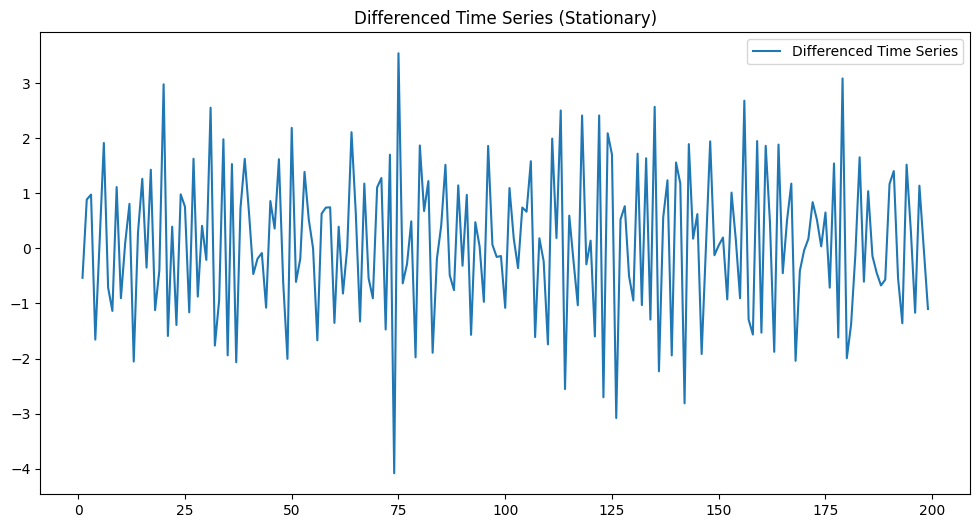

ADF Statistic: -7.66201579065344
p-value: 1.678904647035611e-11
The series is stationary.


In [4]:
# Step 3: Transform the series to stationary
diff_series = time_series.diff().dropna()

plt.figure(figsize=(12, 6))
plt.plot(diff_series, label='Differenced Time Series')
plt.title('Differenced Time Series (Stationary)')
plt.legend()
plt.show()

check_stationarity(diff_series)

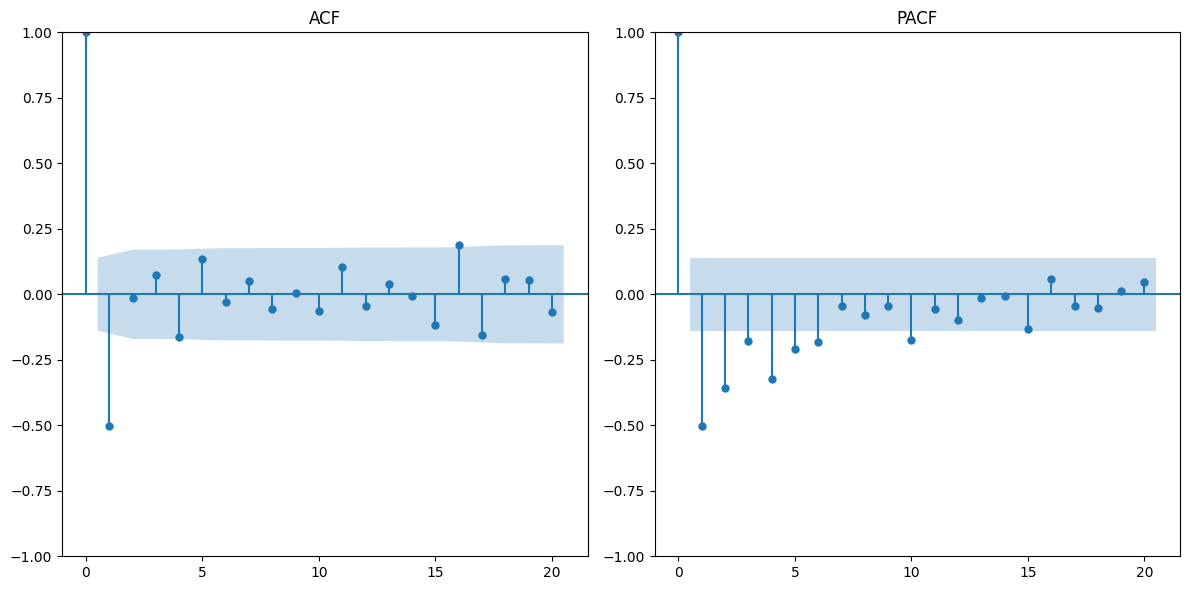

In [5]:
# Step 4: Plot ACF and PACF to determine AR and MA orders
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_series, ax=plt.gca(), lags=20, title='ACF')
plt.subplot(122)
plot_pacf(diff_series, ax=plt.gca(), lags=20, title='PACF')
plt.tight_layout()
plt.show()

In [6]:
# Step 5: Build AR, MA, and ARIMA models
# AR Model
ar_model = ARIMA(time_series, order=(2, 1, 0))
ar_fit = ar_model.fit()
print("AR Model Summary:")
print(ar_fit.summary())

# MA Model
ma_model = ARIMA(time_series, order=(0, 1, 2))
ma_fit = ma_model.fit()
print("MA Model Summary:")
print(ma_fit.summary())

# ARIMA Model
arima_model = ARIMA(time_series, order=(2, 1, 2))
arima_fit = arima_model.fit()
print("ARIMA Model Summary:")
print(arima_fit.summary())

AR Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -301.874
Date:                Sun, 24 Nov 2024   AIC                            609.749
Time:                        22:55:49   BIC                            619.629
Sample:                             0   HQIC                           613.747
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6648      0.071     -9.382      0.000      -0.804      -0.526
ar.L2         -0.3388      0.068     -4.981      0.000      -0.472      -0.205
sigma2         1.2133      0.132  

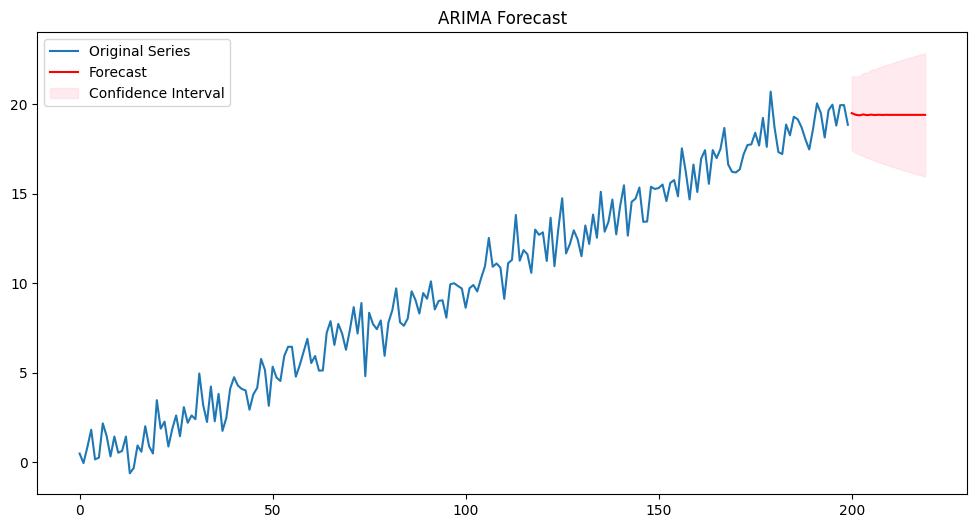

In [7]:
# Step 6: Forecasting with ARIMA
forecast_steps = 20
forecast = arima_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.RangeIndex(start=len(time_series), stop=len(time_series) + forecast_steps, step=1)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Original Series")
plt.plot(forecast_index, forecast.predicted_mean, color="red", label="Forecast")
plt.fill_between(
    forecast_index,
    forecast.conf_int().iloc[:, 0],
    forecast.conf_int().iloc[:, 1],
    color="pink",
    alpha=0.3,
    label="Confidence Interval",
)
plt.title("ARIMA Forecast")
plt.legend()
plt.show()